# Phân tích suy diễn
* Sample
* Population
* Suy diễn

In [2]:
import pandas as pd
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')

df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

dfKhoiC['M1'].describe()

import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)

# Bài tập: Sinh viên kiểm tra xem điểm trung bình của môn thi M2 của khối thi C có bằng 5.7 hay không

# Bài tập: Sinh viên về tự tìm hiểu cách thiết lập mức tin cậy hoặc sai lầm
# Bài tập: Hãy kiểm tra xem có phải điểm trung bình M3
# của thí sinh thi khối C có là 6.5 hay không
# với mức sai lầm là 10%

TtestResult(statistic=7.650519779016341, pvalue=3.6339826927369557e-06, df=13)

In [4]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(df['M1'], value=8.0)

#Bài tập: Hãy kiểm tra xem trung bình M2 có bằng 6.7

(-29.907152266677993, 1.588509177330612e-196)

In [5]:
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)

# Bài tập: 
# Suy diễn xem trung bình M1 có bằng trung bình M3 cho
# thí sinh thi khối C hay không với mức tin cậy 95%

TtestResult(statistic=2.5331368604654054, pvalue=0.017676922552296807, df=26.0)

In [6]:
ztest(df['M1'], df['M2'], value=0)

# Bài tập: Kiểm tra trung bình M2 và M3 có bằng nhau không
# với mức tin cậy 95%

(-2.9004757923795, 0.0037259661678783573)

không cần số lượng mẫu <br>
Giả thiết tương quan kết luận ngc

In [7]:
from scipy.stats.stats import pearsonr

pearsonr(df['M1'], df['M2'])

C:\Users\nguye\AppData\Local\Temp\ipykernel_25676\3460115998.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.03515405725785025, pvalue=0.7284198928723635)

### Fisher test
H0: X, Y independent

In [9]:
import scipy.stats as stats

crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata

NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [11]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.575
p_value is : 0.22763927303454412


### Chi-Square test 
H0: X, Y independent

In [12]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


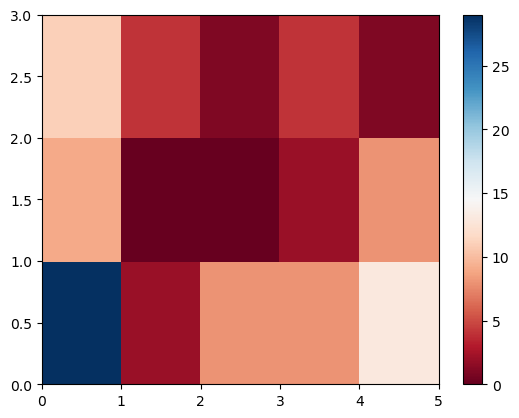

p value is 0.02012461887796485
Dependent (reject H0)


In [13]:
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

### One-way ANOVA (qualitative variable)
H0 : trung bình điểm `M1` trên `nam` = trung bình điểm `M1` trên `nữ`

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table #(p-value 0.444059) < 0.05 châp nhận H0

,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


### Two-way ANOVA
H0: trung bình trên nhiều nhóm của nhóm bằng nhau

In [17]:
model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result) #(p_value 0.166186) > 0.05 không chấp nhận H0

            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN
